In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import itertools
from scipy.stats import chi2_contingency
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel("/Users/shubhabrataroy/Desktop/eMBA/Final Thesis/Mental healthcare diagnosis and treatment-137.xlsx")

In [4]:
df['What is your relationship status ?'] = df['What is your relationship status ?'].replace("Divorsed", 'Divorced')

In [5]:
df["In a week, about how many hours do you spend in gaming ?"] = [str(i) for i in df["In a week, about how many hours do you spend in gaming ?"]]

In [6]:
set(df['What is your relationship status ?'])

{'Committed',
 'Divorced',
 'Married',
 'Prefer not to say',
 'Separated',
 'Single',
 'Windowed'}

In [7]:
df["How many times have you used Virtual Reality (VR) before ?"] = [str(i) for i in df["How many times have you used Virtual Reality (VR) before ?"]]

In [8]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.1f' % pct) if pct > 5 else ''

In [9]:
def plot_pie_chart(df, A, B):
    #l = len(set(df[B]))
    axes = (df.sort_values([A],ascending=False).groupby(A)[B].value_counts()
   .unstack(A).reindex(["Yes", "No", "Maybe"], axis=1)
   .plot.pie(autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', subplots=True, figsize=(12,12), layout=(2,2), legend = False)
        )
    subplot_headings = np.array(["Will use", "Won't use", "Not sure"])
    for ax, h in zip(axes.ravel(), subplot_headings):
        ax.set_title(h, fontsize=13)
        ax.set_ylabel("")
        ax.set_xlabel("")
        #ax.legend(loc="center right", fontsize=10)
    #plt.suptitle(B,fontsize=20, y=0.98)
    plt.tight_layout()
    plt.show()


In [10]:
#A = question of usage -  now
#B = other question - now
#A = Other question - to do
#B = question of usage - to do
def plot_pie_chart_inverse(df, A, B):
    #l = len(set(df[B]))
    lst = list(set(df[A]))
    axes = (df.sort_values([A],ascending=False).groupby(A)[B].value_counts()
   .unstack(A).reindex(lst, axis=1)
   .plot.pie(autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', subplots=True, figsize=(12,12), layout=(int(np.ceil(len(lst)/2)), 2), legend = False)
        )
    subplot_headings = np.array(lst)
    for ax, h in zip(axes.ravel(), subplot_headings):
        ax.set_title(h, fontsize=13)
        ax.set_ylabel("")
        ax.set_xlabel("")
        #ax.legend(loc="center right", fontsize=10)
    #plt.suptitle(B,fontsize=20, y=0.98)
    plt.tight_layout()
    plt.show()    

In [12]:
df.columns

Index(['Where do you currently live ?',
       'Which gender do you identify yourself with? ', 'What is your age ?',
       'What is your highest educational degree ?',
       'Which Sector do you work in ? ', 'What is your relationship status ?',
       'Do you have children ?',
       'Do you think mental health problem is a serious issue ?',
       'Overall how would you rate your physical health ?',
       'Overall how would you rate your mental health ?',
       'Have you ever been diagnosed with a mental disorder before ?',
       'How often do you feel positive about your life ?',
       'Have you heard of any mobile mental health apps ? ',
       'Have you ever used a mental health app yourself ?',
       'Do you think mobile mental health applications are useful in clinical treatment',
       'Would you consider using mental health apps for kid(s) if suggested by the doctor ?',
       'What feature(s) do you think are most important when you consider using a mental healthcare 

In [13]:
gender, unique = pd.factorize(df["Which gender do you identify yourself with? "])
age, unique = pd.factorize(df["What is your age ?"])
education, unique = pd.factorize(df["What is your highest educational degree ?"])
work, unique = pd.factorize(df["Which Sector do you work in ? "])
relationship, unique = pd.factorize(df["What is your relationship status ?"])
children, unique = pd.factorize(df["Do you have children ?"])
ismentalhealthissue, unique = pd.factorize(df["Do you think mental health problem is a serious issue ?"])
physicalhealth, unique = pd.factorize(df["Overall how would you rate your physical health ?"])
mentalhealth, unique = pd.factorize(df["Overall how would you rate your mental health ?"])
mentalhealthdiagnosis, unique = pd.factorize(df["Have you ever been diagnosed with a mental disorder before ?"])
heardmobileapp, unique = pd.factorize(df["Have you heard of any mobile mental health apps ? "])
usedmobileapp, unique = pd.factorize(df["Have you ever used a mental health app yourself ?"])
mobileappusefulness, unique = pd.factorize(df["Do you think mobile mental health applications are useful in clinical treatment"])
game, unique = pd.factorize(df["In a week, about how many hours do you spend in gaming ?"])
vrused, unique = pd.factorize(df["How many times have you used Virtual Reality (VR) before ?"])
vrusefulness, unique = pd.factorize(df["Do you think VR based mobile mental health apps can be more useful in clinical treatment than traditional mobile health apps owing to its immersive nature ?"])
willuse, unique = pd.factorize(df["If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?"])
willuseforkids, unique = pd.factorize(df["If you are suggested by the doctor to use virtual reality based mental healthcare app for your child, would you consider it (if the issues of the previous question does not apply to your child) ?"])



In [14]:
accessibility = [1 if "Not easily accessible" in j.split(";") else 0 for j in df["If you don't use VR frequently, what is keeping you from adopting this form of experience"]]
affordability = [1 if "It is expensive" in j.split(";") else 0 for j in df["If you don't use VR frequently, what is keeping you from adopting this form of experience"]]
content_quality = [1 if "There is not enough content" in j.split(";") else 0 for j in df["If you don't use VR frequently, what is keeping you from adopting this form of experience"]]
technology_maturity = [1 if "The technology is not that good" in j.split(";") else 0 for j in df["If you don't use VR frequently, what is keeping you from adopting this form of experience"]]
    

In [15]:
df1 = pd.DataFrame({"Gender": gender, "Age": age, "Education": education,
                   "Work-sector": work, "Relationship": relationship, "Children": children,
                   "Opinion-on-MH-issue": ismentalhealthissue, "Physical-health-status": physicalhealth,
                   "MH status": mentalhealth, "MH-diagnosis-status": mentalhealthdiagnosis,
                   "MH-app-awareness": heardmobileapp, "MH-mobile-app-usage": usedmobileapp,
                   "Opinion-on-MH-app": mobileappusefulness, "Time-spent-gaming": game, 
                   "VR-experience": vrused, "Opinion-VR-app": vrusefulness, "accessibility": accessibility,
                   "affordability": affordability, "content-quality":content_quality, 
                   "technology-maturity": technology_maturity, "VR-app-acceptance": willuse})

In [16]:
df2 = pd.DataFrame({"Gender": gender, "Age": age, "Education": education,
                   "Work-sector": work, "Relationship": relationship, "Children": children,
                   "Opinion-on-MH-issue": ismentalhealthissue, "Physical-health-status": physicalhealth,
                   "MH status": mentalhealth, "MH-diagnosis-status": mentalhealthdiagnosis,
                   "MH-app-awareness": heardmobileapp, "MH-mobile-app-usage": usedmobileapp,
                   "Opinion-on-MH-app": mobileappusefulness, "Time-spent-gaming": game, 
                   "VR-experience": vrused, "Opinion-VR-app": vrusefulness, "accessibility": accessibility,
                   "affordability": affordability, "content-quality":content_quality, 
                   "technology-maturity": technology_maturity, "VR-app-acceptance-kids": willuseforkids})

In [17]:
df1.to_csv("/Users/shubhabrataroy/Desktop/eMBA/Final Thesis/Mental_healthcare_diagnosis_and_treatment.csv", index = False)

In [18]:
df2.to_csv("/Users/shubhabrataroy/Desktop/eMBA/Final Thesis/Mental_healthcare_diagnosis_and_treatment-kids.csv", index = False)

In [19]:
# may be: 0
# yes: 1
# no: 2

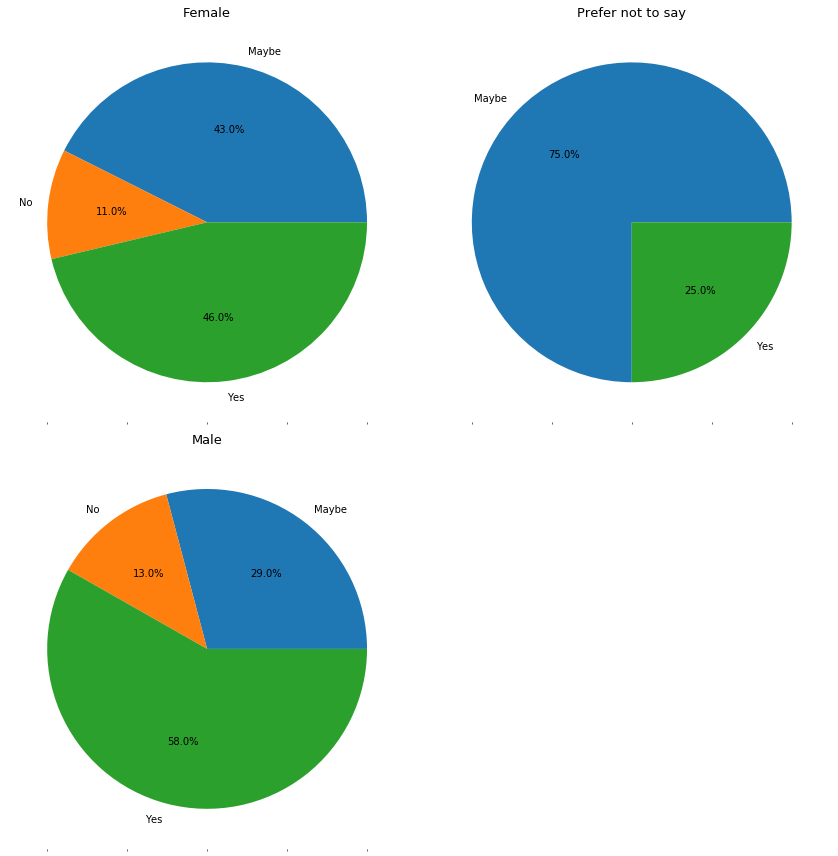

In [19]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "Which gender do you identify yourself with? "
plot_pie_chart_inverse(df, A, B)

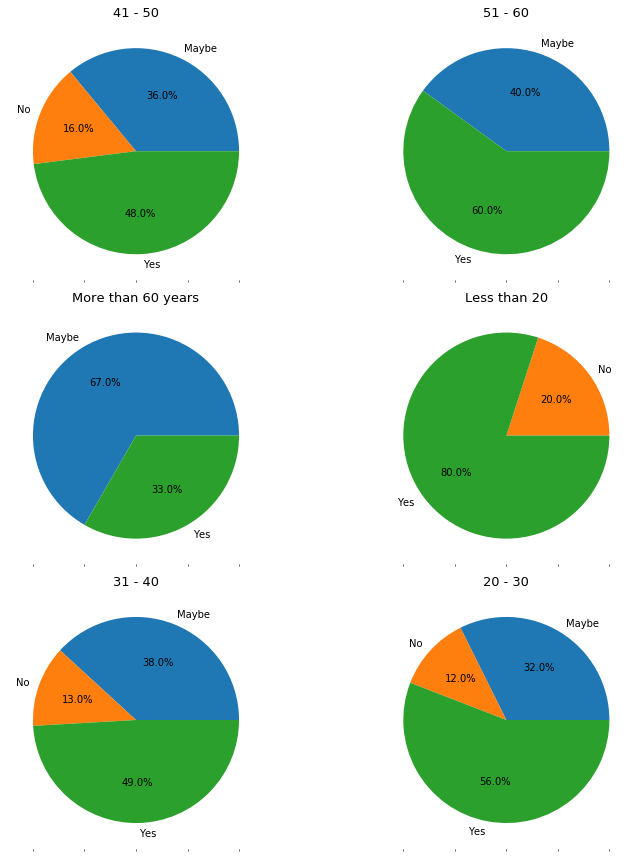

In [20]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "What is your age ?"
plot_pie_chart_inverse(df, A, B)

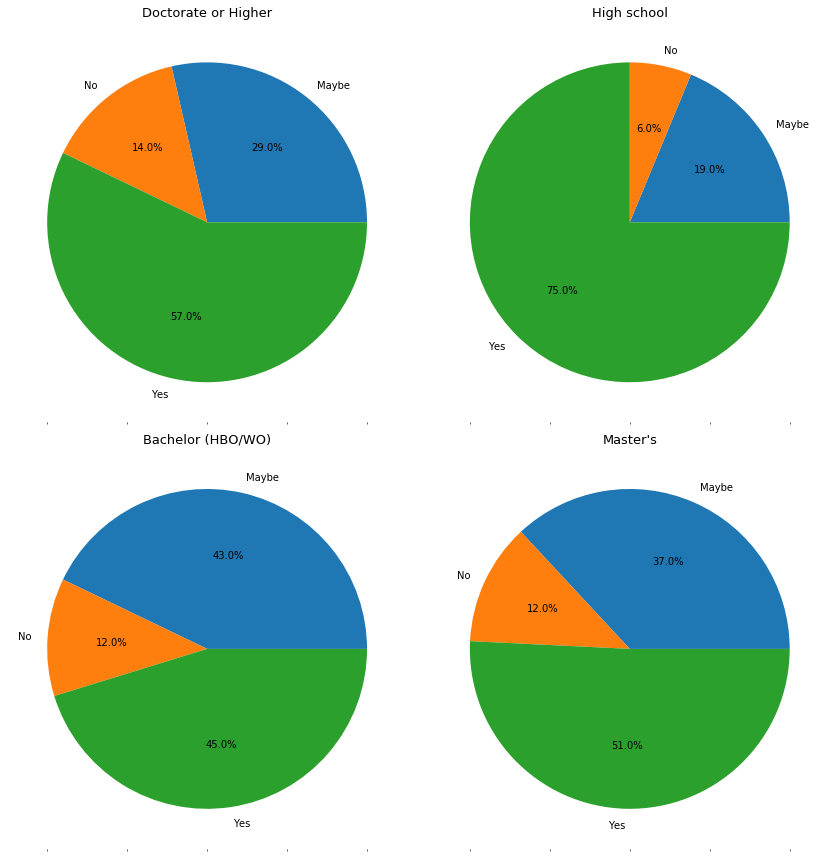

In [21]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "What is your highest educational degree ?"
plot_pie_chart_inverse(df, A, B)

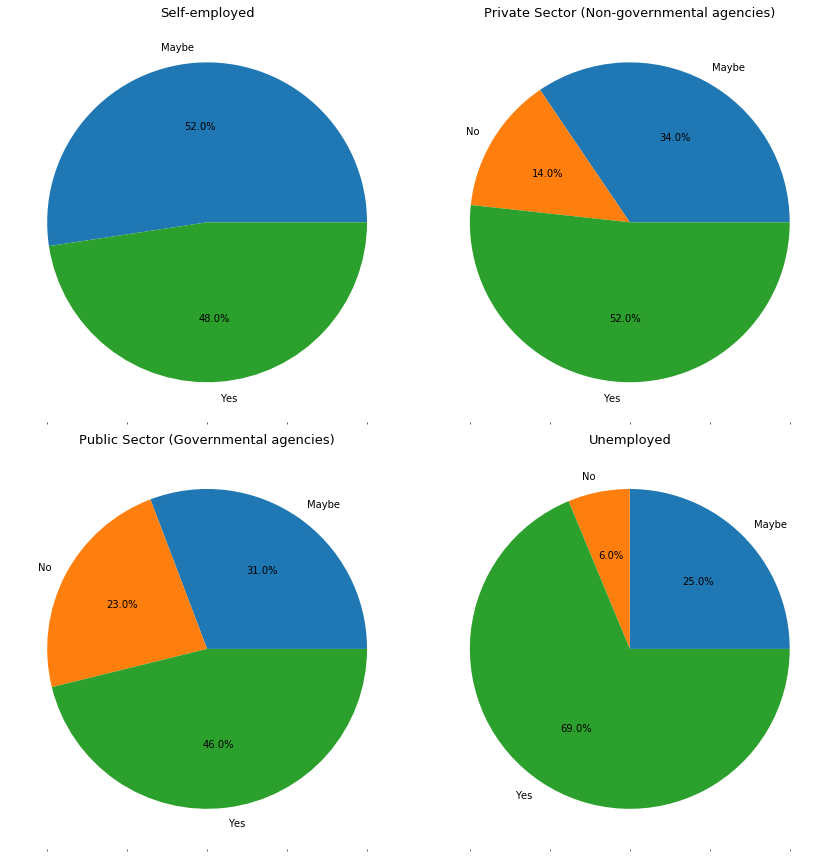

In [22]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "Which Sector do you work in ? "
plot_pie_chart_inverse(df, A, B)

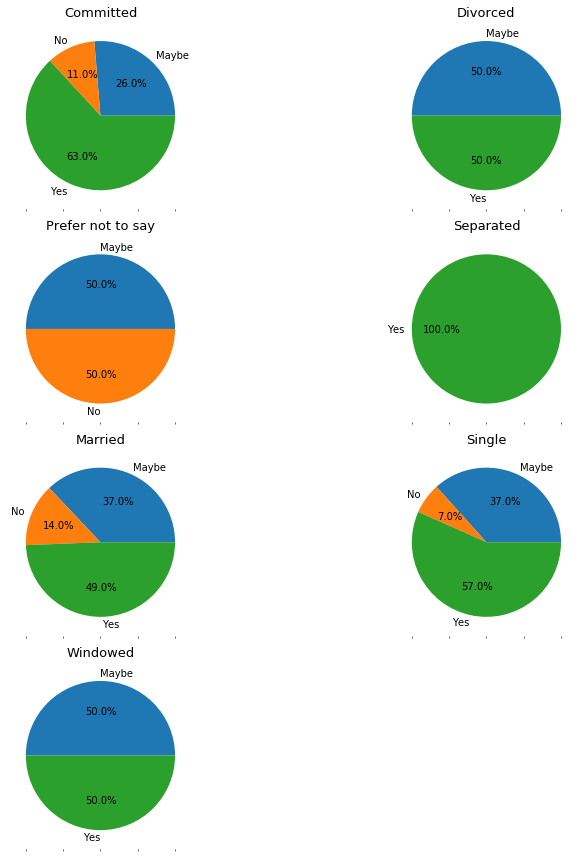

In [23]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "What is your relationship status ?"
plot_pie_chart_inverse(df, A, B)

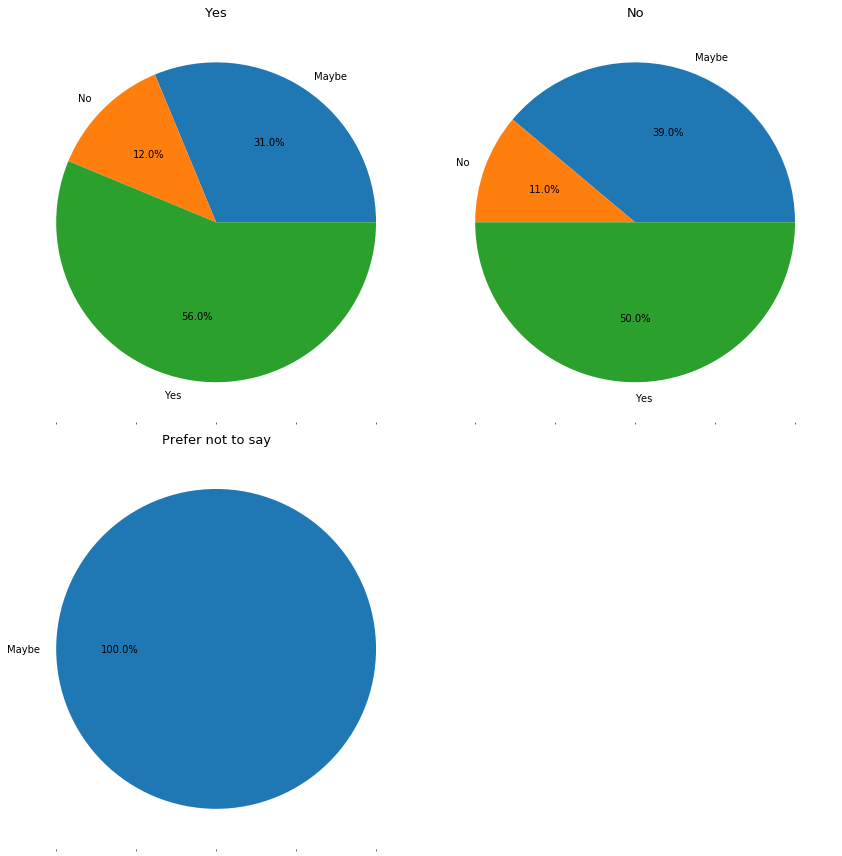

In [24]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "Do you have children ?"
plot_pie_chart_inverse(df, A, B)

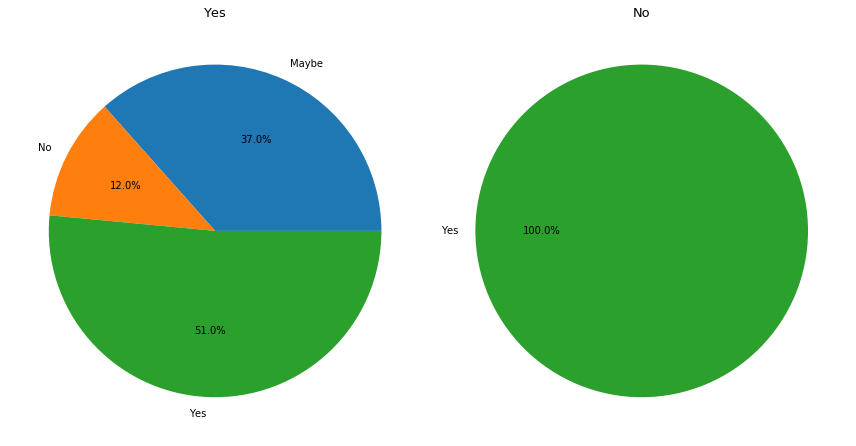

In [25]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "Do you think mental health problem is a serious issue ?"
plot_pie_chart_inverse(df, A, B)

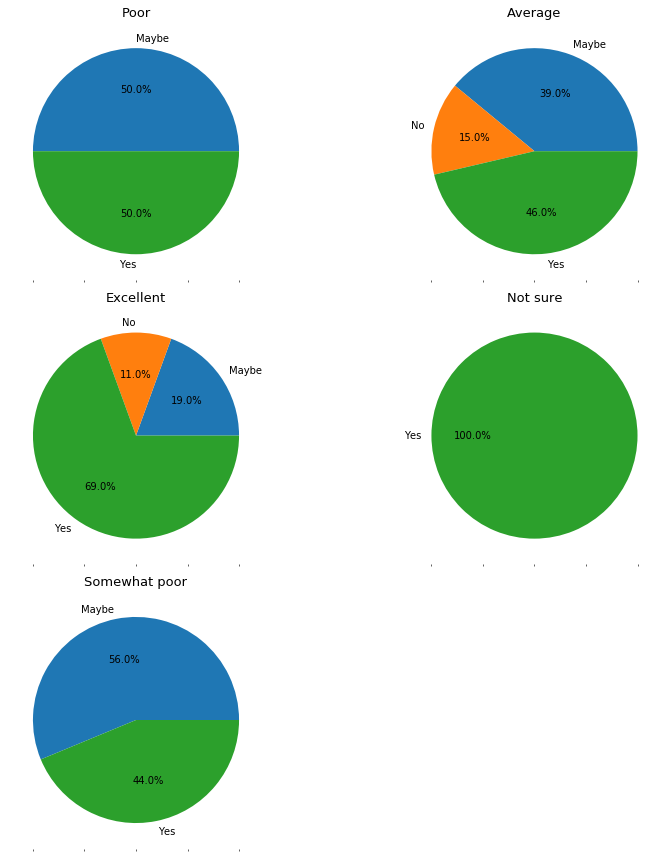

In [26]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "Overall how would you rate your physical health ?"
plot_pie_chart_inverse(df, A, B)

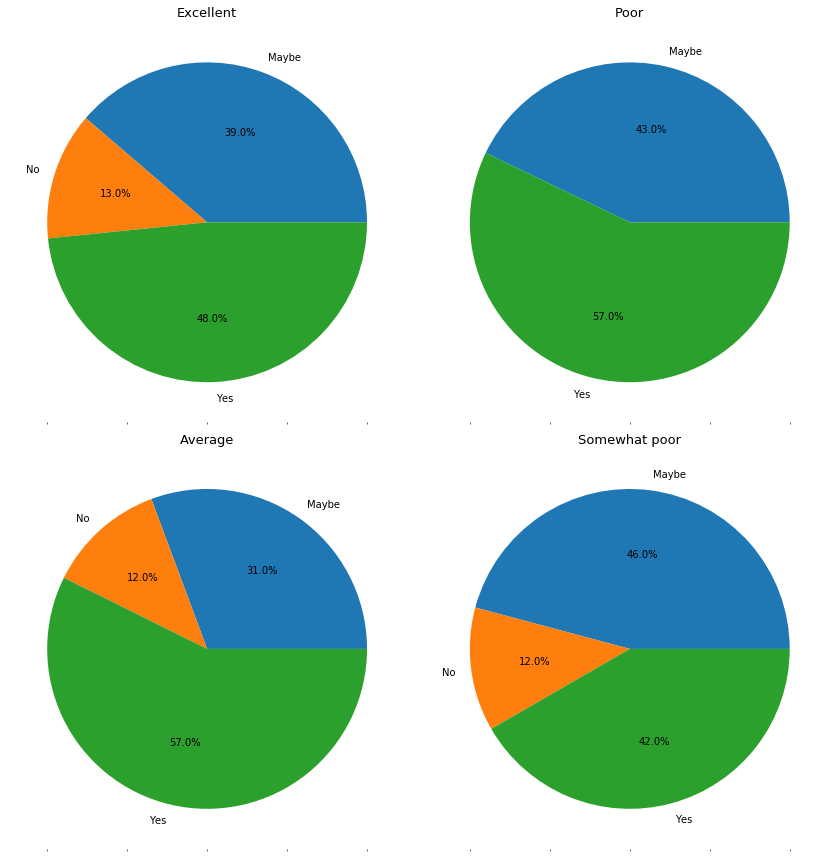

In [27]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "Overall how would you rate your mental health ?"
plot_pie_chart_inverse(df, A, B)

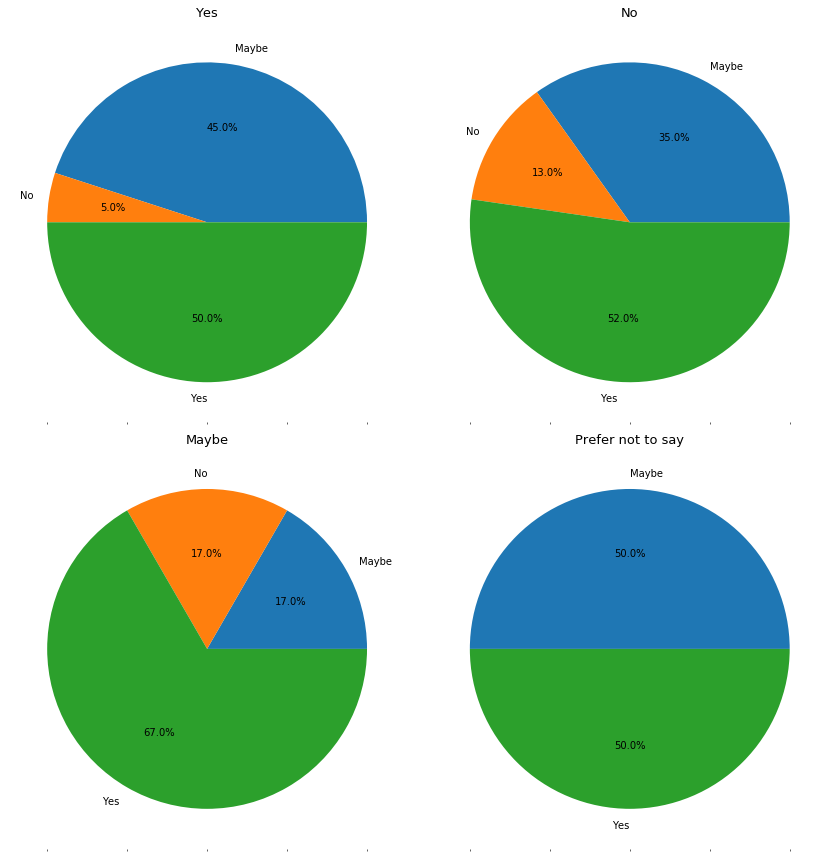

In [28]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = 'Have you ever been diagnosed with a mental disorder before ?'
plot_pie_chart_inverse(df, A, B)

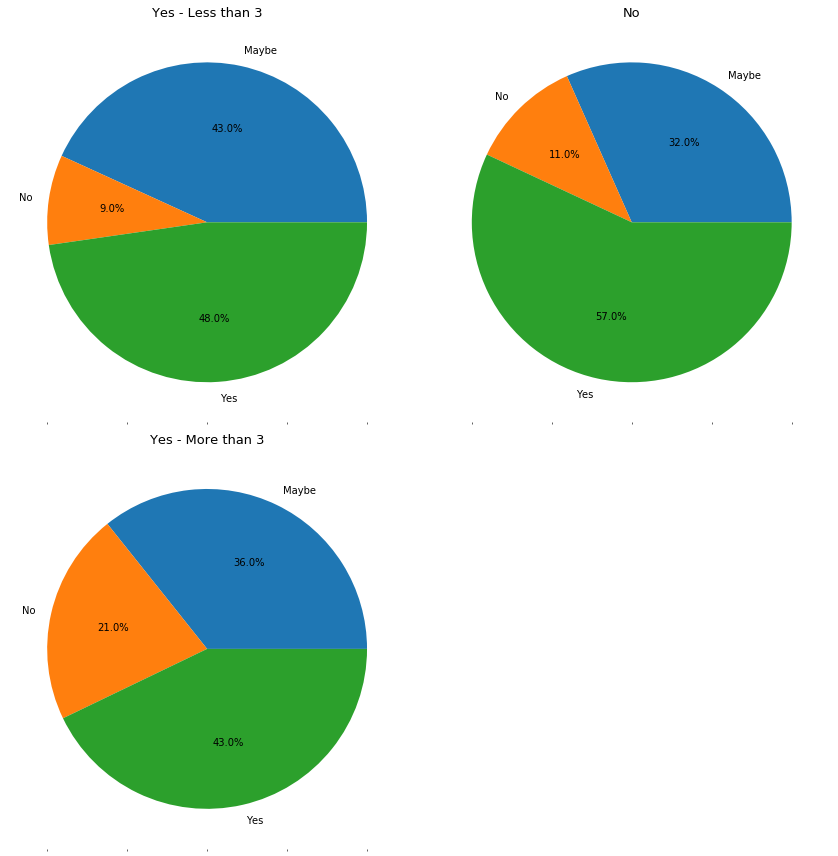

In [29]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "Have you heard of any mobile mental health apps ? "
plot_pie_chart_inverse(df, A, B)

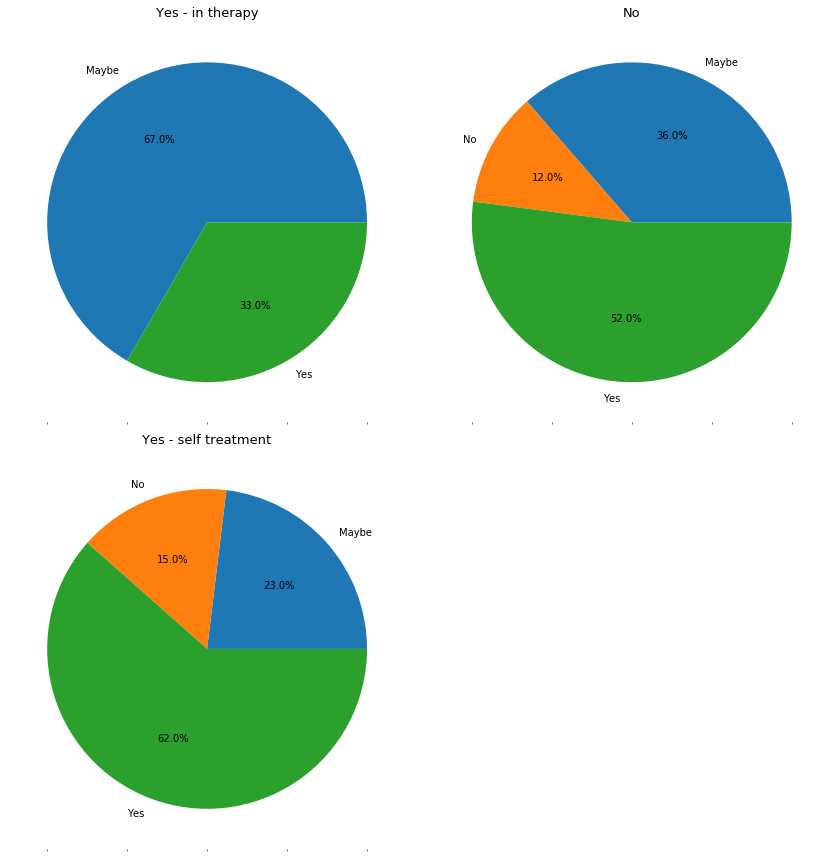

In [30]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "Have you ever used a mental health app yourself ?"
plot_pie_chart_inverse(df, A, B)

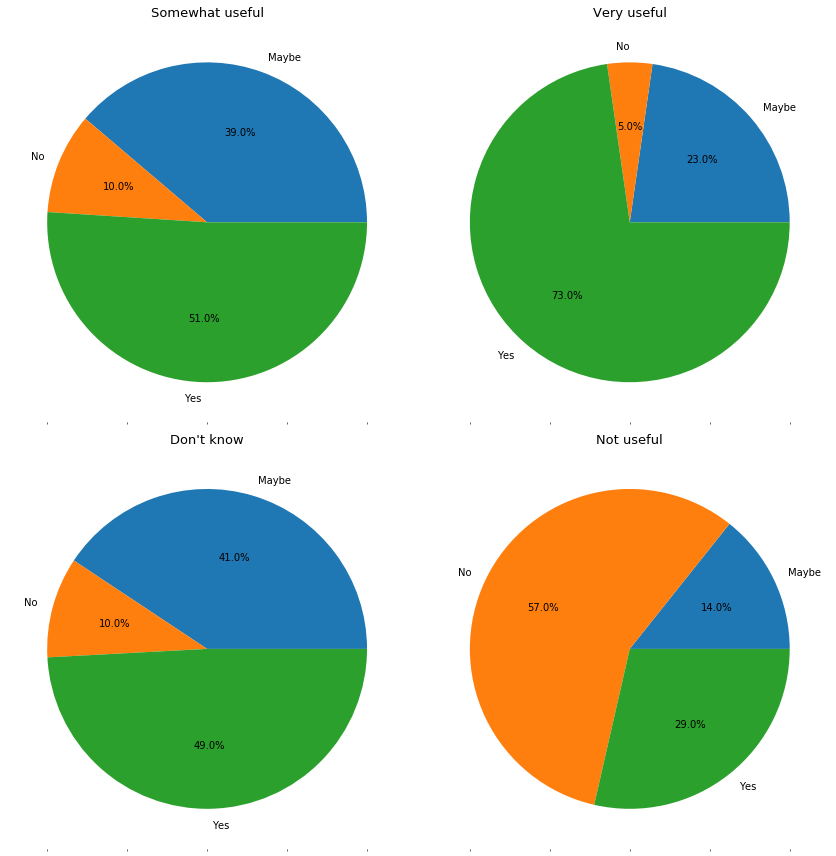

In [31]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "Do you think mobile mental health applications are useful in clinical treatment"
plot_pie_chart_inverse(df, A, B)

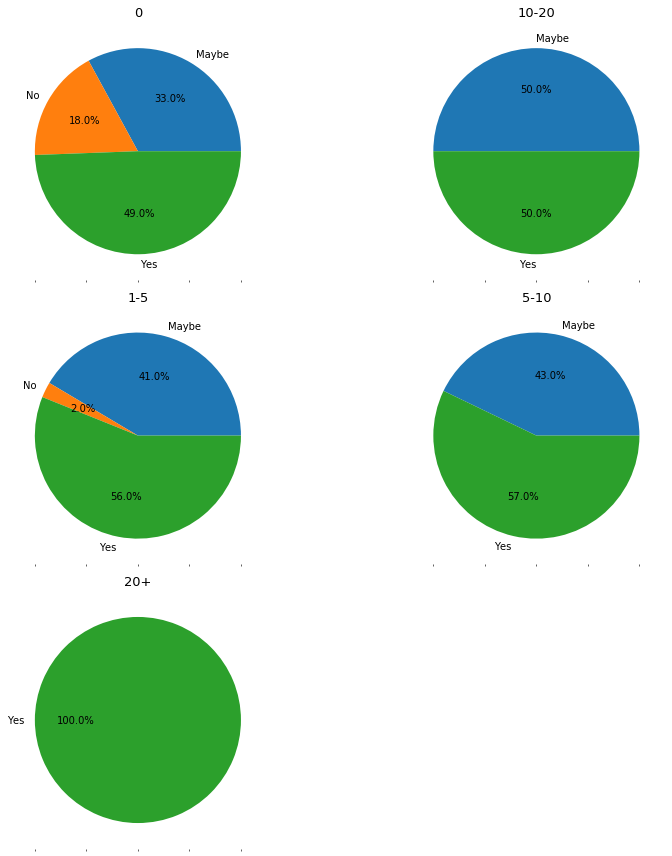

In [32]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "In a week, about how many hours do you spend in gaming ?"
plot_pie_chart_inverse(df, A, B)

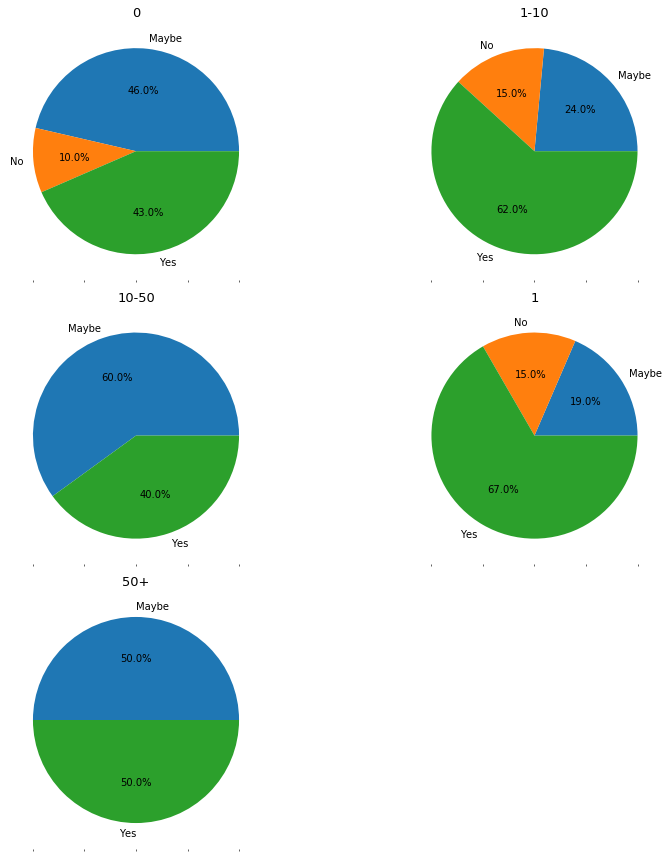

In [33]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = "How many times have you used Virtual Reality (VR) before ?"
plot_pie_chart_inverse(df, A, B)

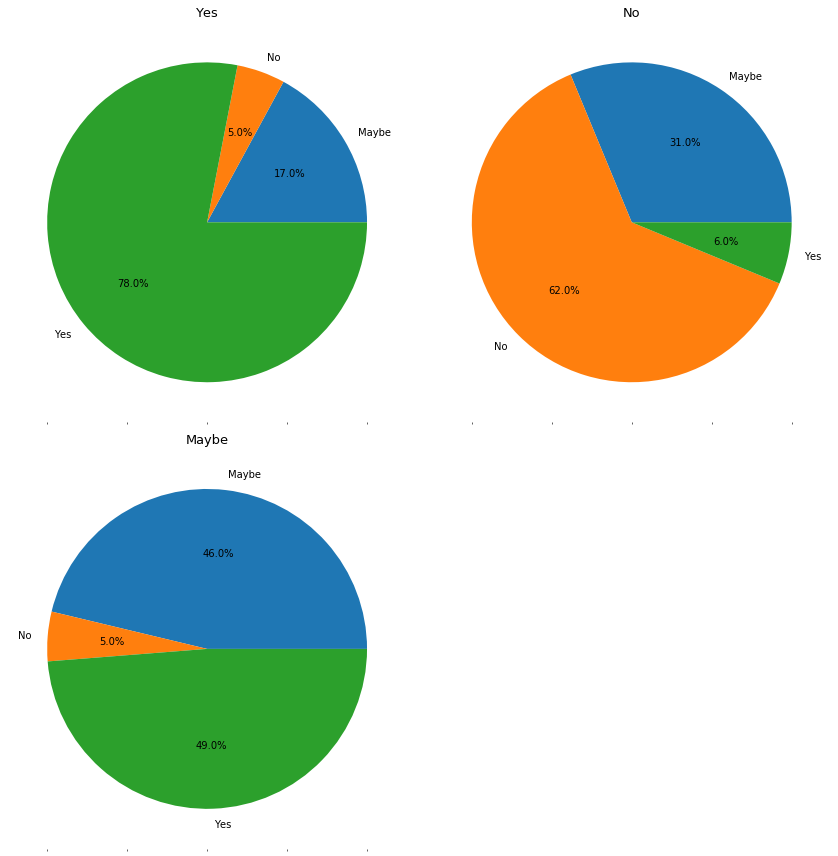

In [34]:
B = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
A = 'Do you think VR based mobile mental health apps can be more useful in clinical treatment than traditional mobile health apps owing to its immersive nature ?'
plot_pie_chart_inverse(df, A, B)


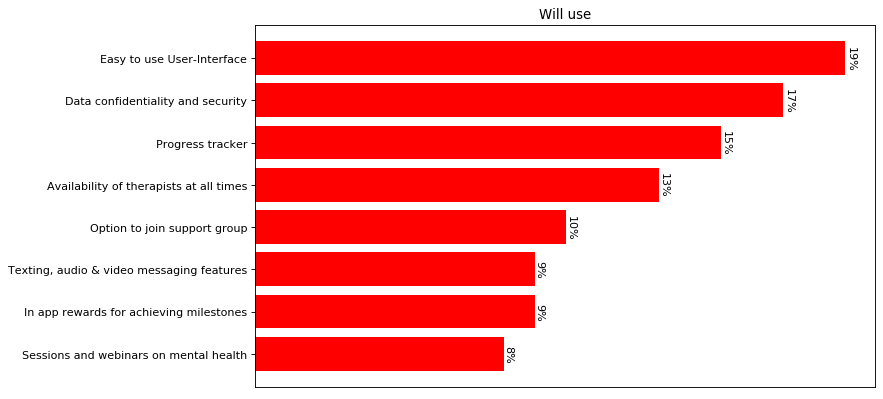

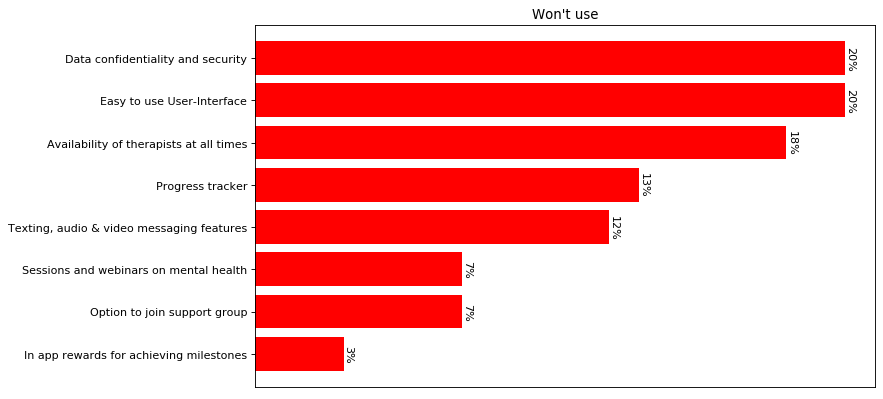

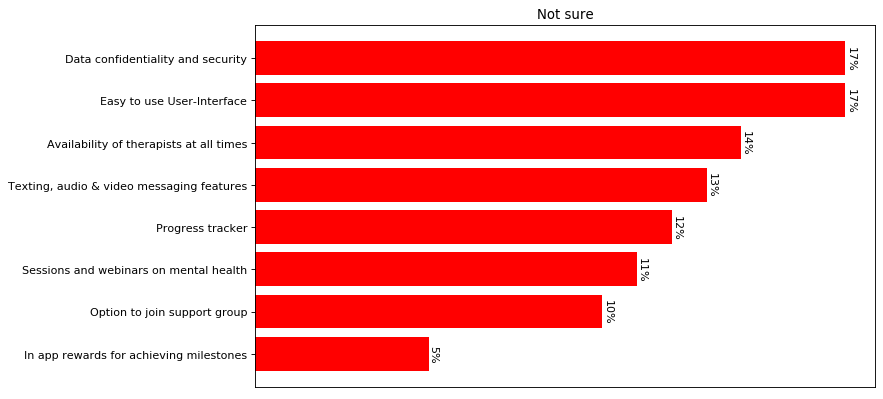

In [36]:
A = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
B = 'What feature(s) do you think are most important when you consider using a mental healthcare app ? Please select all that you think are important.'
f = 1
for i, t in zip(["Yes", "No", "Maybe"], ["Will use", "Won't use", "Not sure"]):
    Df = df[df[A] == i]
    dict_ = Counter(list(itertools.chain(*[ ii.split(";") for ii in list(Df[B])])))     
    s = sum(list(dict_.values()))
    for key, value in dict_.items():
        dict_[key] = round(value*100/s)
    #print(dict_)
    dict_ = dict(sorted(dict_.items(), key=lambda item: item[1]))
    plt.figure(f, figsize=(10, 6), dpi=80)
    plt.title(t)
    plt.barh(range(len(dict_)), list(dict_.values()), align='center', color = "r")
    for index, value in enumerate(list(dict_.values())):
        plt.text(value, index,
                 str(value) + "%", rotation=270, va='center')
    plt.yticks(range(len(dict_)), list(dict_.keys()))
    plt.xticks([], [])
    plt.show()
    f = f+1
 

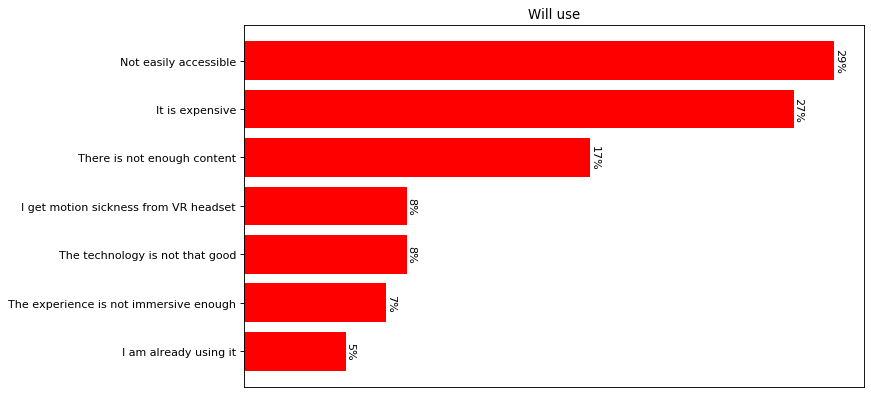

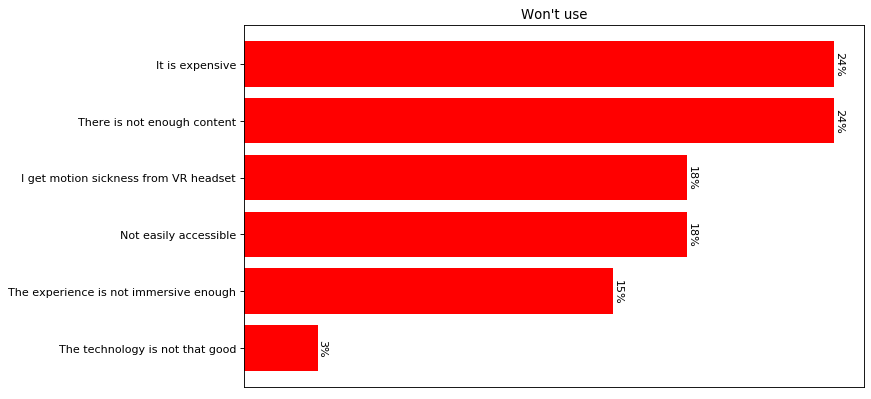

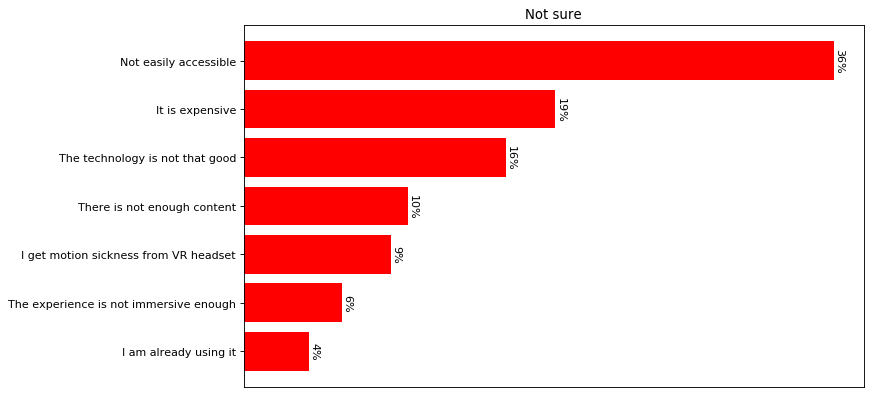

In [37]:
A = 'If you are suggested to use virtual reality based mental healthcare app by your doctor, would you try it (if the issues of the previous question does not apply to you) ?'
B = "If you don't use VR frequently, what is keeping you from adopting this form of experience"
f = 1
for i, t in zip(["Yes", "No", "Maybe"], ["Will use", "Won't use", "Not sure"]):
    Df = df[df[A] == i]
    dict_ = Counter(list(itertools.chain(*[ ii.split(";") for ii in list(Df[B])])))     
    s = sum(list(dict_.values()))
    for key, value in dict_.items():
        dict_[key] = round(value*100/s)
    #print(dict_)
    dict_ = dict(sorted(dict_.items(), key=lambda item: item[1]))
    plt.figure(f, figsize=(10, 6), dpi=80)
    plt.title(t)
    plt.barh(range(len(dict_)), list(dict_.values()), align='center', color = "r")
    for index, value in enumerate(list(dict_.values())):
        plt.text(value, index,
                 str(value) + "%", rotation=270, va='center')
    plt.yticks(range(len(dict_)), list(dict_.keys()))
    plt.xticks([], [])
    plt.show()
    f = f+1
 

In [ ]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in df_:
  col = []
  for var2 in df_ :
    cramers =cramers_V(df_[var1], df_[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
DD = pd.DataFrame(cramers_results, columns = df_.columns, index =df_.columns)


In [ ]:
DD

In [ ]:
plt.figure(figsize=(16, 8))
mask = np.triu(np.ones_like(DD, dtype=np.bool))
cut_off = 0.1  # only show cells with abs(correlation) at least this value
extreme_1 = 0.25  # show with a star
extreme_2 = 0.35  # show with a second star
extreme_3 = 0.40  # show with a third star
mask |= np.abs(DD) < cut_off
DD = DD[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    DD = DD.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in DD.to_numpy()]
heatmap = sns.heatmap(DD, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

In [ ]:
X = df_[['Gender', 'Age', 'Education', 'Work-sector', 'Relationship', 'Children',
       'Opinion on mental health issue', 'Physical health status',
       'Mental health status', 'Mental health diagnosis status',
       'Mental health app awareness', 'Mental health mobile app usage',
       'Opinion on app usefulness', 'Time spent on gaming', 'VR experience',
       'Opinion on VR app usefulness']] #independent columns
y = np.array(df_['VR app acceptance on recommendation'])    #target column i.e price range

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best feature

In [ ]:
df.columns

In [ ]:
list(set(df['Which gender do you identify yourself with? ']))

In [39]:
# factor analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [40]:
Df = df1[['Opinion-on-MH-issue', 'Physical-health-status', 'MH status',
       'MH-diagnosis-status', 'MH-app-awareness', 'MH-mobile-app-usage',
       'Opinion-on-MH-app', 'Time-spent-gaming', 'VR-experience',
       'Opinion-VR-app', 'accessibility', 'affordability', 'content-quality',
       'technology-maturity']]

In [41]:
chi2, p = calculate_bartlett_sphericity(Df) # adults

In [42]:
print("Chi squared value: ",chi2)
print("p value: ",p)


Chi squared value:  155.87819012735358
p value:  2.7351931519135048e-05


In [43]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(Df)
print(kmo_model)

0.5220143205566917


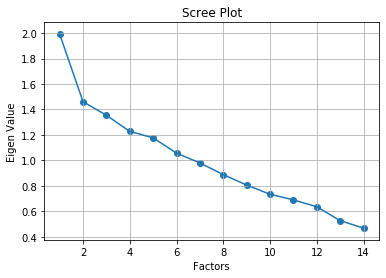

In [44]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=Df.shape[1])
fa.fit(Df)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,Df.shape[1]+1),ev)
plt.plot(range(1,Df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [47]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(Df)
print(pd.DataFrame(fa.loadings_,index=Df.columns))
Df_ = pd.DataFrame(fa.loadings_,index=Df.columns)
Df_.to_excel("/Users/shubhabrataroy/Desktop/eMBA/Final Thesis/Mental_healthcare_diagnosis_and_treatment_factors_adult.xlsx")

                               0         1         2         3         4  \
Opinion-on-MH-issue     0.139113  0.077767 -0.118437  0.016507  0.211206   
Physical-health-status -0.029344 -0.094018  0.466553  0.050965  0.015627   
MH status              -0.085235  0.019158  0.626920  0.112826 -0.149640   
MH-diagnosis-status     0.067236 -0.138205  0.167919  0.360370 -0.071558   
MH-app-awareness        0.003034  0.657811 -0.000527 -0.147195  0.189640   
MH-mobile-app-usage     0.097692 -0.379208  0.379303  0.010907  0.039138   
Opinion-on-MH-app       0.046345  0.455754 -0.094950 -0.048034 -0.061354   
Time-spent-gaming       0.029800 -0.228524  0.061352  0.382938  0.092600   
VR-experience          -0.094184 -0.007379 -0.029959  0.074402  0.666488   
Opinion-VR-app          0.060537  0.125904  0.058818  0.094630  0.014867   
accessibility          -0.177107  0.127574 -0.207088  0.526601  0.070867   
affordability           0.027045 -0.013162  0.188384  0.360562  0.038986   
content-qual

In [48]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          1.080877  0.912969  0.901148  0.761675  0.579254  0.548975
Proportional Var  0.077206  0.065212  0.064368  0.054405  0.041375  0.039213
Cumulative Var    0.077206  0.142418  0.206785  0.261191  0.302566  0.341778
